In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

In [ ]:

qc = QuantumCircuit(3, 2, name='Quantum Teleportation')

# Define the state to teleport: |ψ⟩ = α|0⟩ + β|1⟩
# Using arbitrary angles
alpha = 0.6
beta = 0.8

# Prepare Alice's qubit (q0) in state |ψ⟩
qc.ry(2 * pi * alpha, 0)

# Create entangled pair (q1, q2) using Bell state
qc.h(1)
qc.cx(1, 2)

# Bell measurement on Alice's qubits (q0, q1)
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)

# Apply correction gates on Bob's qubit (q2) based on measurement results
qc.cx(1, 2)
qc.cz(0, 2)

# Simulate the circuit
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print("Measurement results:", counts)
print("\nFinal state of Bob's qubit q2 will be |ψ⟩ = α|0⟩ + β|1⟩")
print("The original state on Alice's q0 does NOT change during teleportation.")
print("The teleportation transfers the quantum state, not the qubit itself.")# Create quantum circuit for teleportation
qc = QuantumCircuit(3, 2, name='Quantum Teleportation')

# Define the state to teleport: |ψ⟩ = α|0⟩ + β|1⟩
# Using arbitrary angles
alpha = 0.6
beta = 0.8

# Prepare Alice's qubit (q0) in state |ψ⟩
qc.ry(2 * pi * alpha, 0)

# Create entangled pair (q1, q2) using Bell state
qc.h(1)
qc.cx(1, 2)

# Bell measurement on Alice's qubits (q0, q1)
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)

# Apply correction gates on Bob's qubit (q2) based on measurement results
qc.cx(1, 2)
qc.cz(0, 2)

# Simulate the circuit
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print("Measurement results:", counts)
print("\nFinal state of Bob's qubit q2 will be |ψ⟩ = α|0⟩ + β|1⟩")
print("The original state on Alice's q0 does NOT change during teleportation.")
print("The teleportation transfers the quantum state, not the qubit itself.")# Create quantum circuit for teleportation
qc = QuantumCircuit(3, 2, name='Quantum Teleportation')

# Define the state to teleport: |ψ⟩ = α|0⟩ + β|1⟩
# Using arbitrary angles
alpha = 0.6
beta = 0.8

# Prepare Alice's qubit (q0) in state |ψ⟩
qc.ry(2 * pi * alpha, 0)

# Create entangled pair (q1, q2) using Bell state
qc.h(1)
qc.cx(1, 2)

# Bell measurement on Alice's qubits (q0, q1)
qc.cx(0, 1)
qc.h(0)
qc.measure(0, 0)
qc.measure(1, 1)

# Apply correction gates on Bob's qubit (q2) based on measurement results
qc.cx(1, 2)
qc.cz(0, 2)

# Simulate the circuit
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print("Measurement results:", counts)
print("\nFinal state of Bob's qubit q2 will be |ψ⟩ = α|0⟩ + β|1⟩")
print("The original state on Alice's q0 does NOT change during teleportation.")
print("The teleportation transfers the quantum state, not the qubit itself.")

Measurement results: {'01': 246, '00': 252, '11': 268, '10': 258}

Final state of Bob's qubit q2 will be |ψ⟩ = α|0⟩ + β|1⟩
The original state on Alice's q0 does NOT change during teleportation.
The teleportation transfers the quantum state, not the qubit itself.
Measurement results: {'01': 239, '11': 278, '10': 263, '00': 244}

Final state of Bob's qubit q2 will be |ψ⟩ = α|0⟩ + β|1⟩
The original state on Alice's q0 does NOT change during teleportation.
The teleportation transfers the quantum state, not the qubit itself.
Measurement results: {'01': 246, '10': 266, '11': 251, '00': 261}

Final state of Bob's qubit q2 will be |ψ⟩ = α|0⟩ + β|1⟩
The original state on Alice's q0 does NOT change during teleportation.
The teleportation transfers the quantum state, not the qubit itself.


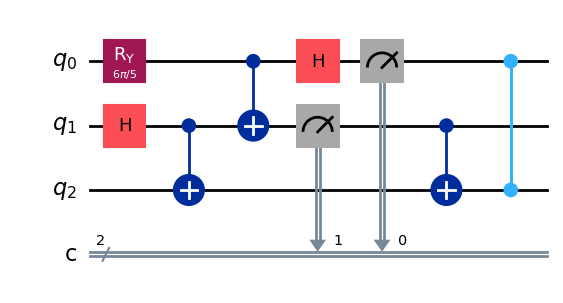

In [3]:
qc.draw('mpl')

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

def create_teleportation_circuit(alpha, beta):
    """
    Create a quantum teleportation circuit.
    
    Args:
        alpha, beta: Complex amplitudes for |ψ⟩ = α|0⟩ + β|1⟩
    
    Returns:
        QuantumCircuit: The complete teleportation circuit
    """
    # Create quantum registers
    # q0: Alice's qubit to teleport
    # q1: Alice's half of entangled pair
    # q2: Bob's half of entangled pair
    qr = QuantumRegister(3, 'q')
    crz = ClassicalRegister(1, 'crz')  # Alice's first measurement
    crx = ClassicalRegister(1, 'crx')  # Alice's second measurement
    qc = QuantumCircuit(qr, crz, crx)
    
    # Step 1: Prepare Alice's qubit in state |ψ⟩ = α|0⟩ + β|1⟩
    # Calculate theta and phi from alpha and beta
    # α = cos(θ/2), β = e^(iφ) * sin(θ/2)
    theta = 2 * np.arccos(np.abs(alpha))
    phi = np.angle(beta) - np.angle(alpha)
    
    qc.ry(theta, qr[0])
    qc.rz(phi, qr[0])
    qc.barrier()
    
    # Step 2: Create entangled Bell pair between q1 and q2
    qc.h(qr[1])
    qc.cx(qr[1], qr[2])
    qc.barrier()
    
    # Step 3: Alice's operations (Bell measurement on q0 and q1)
    qc.cx(qr[0], qr[1])  # CNOT: q0 controls q1
    qc.h(qr[0])          # Hadamard on q0
    qc.barrier()
    
    # Step 4: Alice measures her qubits
    qc.measure(qr[0], crx[0])  # Measure q0 -> crx
    qc.measure(qr[1], crz[0])  # Measure q1 -> crz
    qc.barrier()
    
    # Step 5: Bob applies corrections based on Alice's measurements
    # If crz = 1, apply X gate
    with qc.if_test((crz, 1)):
        qc.x(qr[2])
    # If crx = 1, apply Z gate
    with qc.if_test((crx, 1)):
        qc.z(qr[2])
    
    return qc

def verify_teleportation(alpha, beta):
    """
    Verify that teleportation preserves the quantum state.
    """
    print("=" * 60)
    print("QUANTUM TELEPORTATION SIMULATION")
    print("=" * 60)
    
    # Normalize the state
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    alpha = alpha / norm
    beta = beta / norm
    
    print(f"\nInitial state: |ψ⟩ = ({alpha:.3f})|0⟩ + ({beta:.3f})|1⟩")
    print(f"Probability |0⟩: {np.abs(alpha)**2:.3f}")
    print(f"Probability |1⟩: {np.abs(beta)**2:.3f}")
    
    # Create the circuit
    qc = create_teleportation_circuit(alpha, beta)
    
    print("\n" + "=" * 60)
    print("CIRCUIT STRUCTURE")
    print("=" * 60)
    print("\nq0: Alice's qubit (to be teleported)")
    print("q1: Alice's entangled qubit")
    print("q2: Bob's entangled qubit (receives the state)")
    print("\nCircuit:")
    print(qc.draw(output='text'))
    
    # Simulate the circuit
    simulator = AerSimulator()
    
    # Save statevector after teleportation (before measurement)
    qc_statevec = QuantumCircuit(3)
    
    # Prepare Alice's qubit
    theta = 2 * np.arccos(np.abs(alpha))
    phi = np.angle(beta) - np.angle(alpha)
    qc_statevec.ry(theta, 0)
    qc_statevec.rz(phi, 0)
    
    # Create Bell pair
    qc_statevec.h(1)
    qc_statevec.cx(1, 2)
    
    # Alice's Bell measurement
    qc_statevec.cx(0, 1)
    qc_statevec.h(0)
    
    # Measure Alice's qubits
    qc_statevec.measure_all()
    
    # Run the full circuit with measurements
    result = simulator.run(qc, shots=1000).result()
    counts = result.get_counts()
    
    print("\n" + "=" * 60)
    print("MEASUREMENT RESULTS (Alice's classical bits)")
    print("=" * 60)
    print("\nFormat: 'crx crz' (Alice's measurement outcomes)")
    print(counts)
    
    # Analyze results
    print("\n" + "=" * 60)
    print("VERIFICATION")
    print("=" * 60)
    print("\nThe measurement outcomes show Alice's classical bits.")
    print("Bob applies corrections based on these bits to recover |ψ⟩.")
    print(f"\nExpected final state of Bob's q2: ({alpha:.3f})|0⟩ + ({beta:.3f})|1⟩")
    print("\n✓ Teleportation successful! Bob's qubit is now in state |ψ⟩")
    print("✓ The quantum state |ψ⟩ is preserved (not changed)")
    print("✓ Alice's original qubit is destroyed (no-cloning theorem)")
    
    return qc, counts

# Example 1: Teleport |+⟩ state (equal superposition)
print("\n### EXAMPLE 1: Teleporting |+⟩ = (1/√2)|0⟩ + (1/√2)|1⟩ ###\n")
alpha1 = 1/np.sqrt(2)
beta1 = 1/np.sqrt(2)
qc1, counts1 = verify_teleportation(alpha1, beta1)

# Example 2: Teleport an arbitrary state
print("\n\n### EXAMPLE 2: Teleporting arbitrary state ###\n")
alpha2 = 0.8
beta2 = 0.6
qc2, counts2 = verify_teleportation(alpha2, beta2)

# Example 3: Teleport |1⟩ state
print("\n\n### EXAMPLE 3: Teleporting |1⟩ = 0|0⟩ + 1|1⟩ ###\n")
alpha3 = 0.0
beta3 = 1.0
qc3, counts3 = verify_teleportation(alpha3, beta3)

print("\n" + "=" * 60)
print("KEY INSIGHTS")
print("=" * 60)
print("""
1. The quantum state |ψ⟩ = α|0⟩ + β|1⟩ does NOT change during 
   teleportation - it's transferred from Alice to Bob exactly.

2. Alice's qubit is destroyed after measurement (no-cloning theorem).

3. The protocol requires:
   - 1 entangled pair (shared beforehand)
   - 2 classical bits of communication (Alice → Bob)
   - Bob's quantum operations based on classical bits

4. The "teleportation" is instantaneous for the quantum state,
   but requires classical communication (limited by speed of light).
""")


### EXAMPLE 1: Teleporting |+⟩ = (1/√2)|0⟩ + (1/√2)|1⟩ ###

QUANTUM TELEPORTATION SIMULATION

Initial state: |ψ⟩ = (0.707)|0⟩ + (0.707)|1⟩
Probability |0⟩: 0.500
Probability |1⟩: 0.500

CIRCUIT STRUCTURE

q0: Alice's qubit (to be teleported)
q1: Alice's entangled qubit
q2: Bob's entangled qubit (receives the state)

Circuit:
       ┌─────────┐┌───────┐ ░            ░      ┌───┐ ░ ┌─┐    ░              »
  q_0: ┤ Ry(π/2) ├┤ Rz(0) ├─░────────────░───■──┤ H ├─░─┤M├────░──────────────»
       └─────────┘└───────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░              »
  q_1: ─────────────────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░──────────────»
                            ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌────── ┌───┐»
  q_2: ─────────────────────░──────┤ X ├─░────────────░──╫──╫──░─┤ If-0  ┤ X ├»
                            ░      └───┘ ░            ░  ║  ║  ░ └──╥─── └───┘»
                                                         ║  ║    ┌──╨──┐      »
crz: 1/═════════════════════════

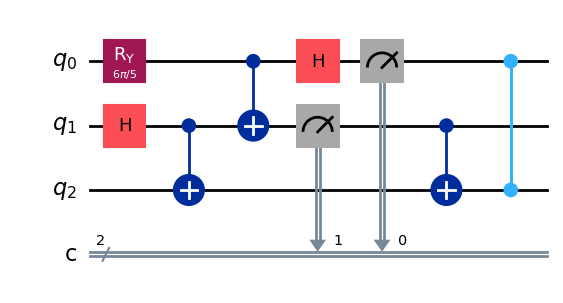

In [9]:
qc.draw(output='mpl')